In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netfilx-data/netflix_titles.csv
/kaggle/input/netflix-data/netflix_titles.csv


In [104]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [106]:
#Load the dataset
df = pd.read_csv("/kaggle/input/netflix-data/netflix_titles.csv")

#preview Data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [107]:
# Dataset Overiview 
print("Rows:", df.shape[0], "| Columns:", df.shape[1])
df.info()

#Check for missing values
df.isnull().sum()

Rows: 8807 | Columns: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [108]:
#copy of the orginal to avoid modifying it
df_clean = df.copy()

#Drop rows missing key info
df_clean.dropna(subset=['title','type', 'listed_in', 'date_added'], inplace=True)

# Standardise whitespace and capitalisation
df_clean['title'] = df_clean['title'].str.strip()
df_clean['type'] = df_clean['type'].str.strip().str.title()
df_clean['listed_in'] = df_clean['listed_in'].str.strip()
df_clean['country'] = df_clean['country'].fillna('Unknown').str.strip()
df_clean['duration'] = df_clean['duration'].fillna('Unknown').str.strip()

# Convert date_added to datetime
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

# Extract year/month
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month

# Ensure release_year is numeric
df_clean['release_year'] = pd.to_numeric(df_clean['release_year'], errors='coerce')

# Create exploded genre DataFrame
df_genres = df_clean.assign(
    genre=df_clean['listed_in'].str.split(', ')
).explode('genre')

# Clean up genre text formatting
df_genres['genre'] = df_genres['genre'].str.strip().str.title()
df_genres['type'] = df_genres['type'].str.strip().str.title()
df_genres['type'] = df_genres['type'].replace({'Tv Show': 'TV Show'})

# Create exploded countries DataFrame
df_countries = df_clean.assign(
    country_spl=df_clean['country'].str.split(', ')
).explode('country_spl')

# Clean up countries text formatting
df_countries['country_spl'] = df_countries['country_spl'].str.strip()
df_countries['country_spl'].replace('', 'Unknown', inplace=True)
df_countries['country_spl'].fillna('Unknown', inplace=True)

/tmp/ipykernel_36/2359244104.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_countries['country_spl'].replace('', 'Unknown', inplace=True)
/tmp/ipykernel_36/2359244104.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [109]:
#check to see if everything is clean
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7972 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8709 non-null   float64       
 13  month_added   8709 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 1.0+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

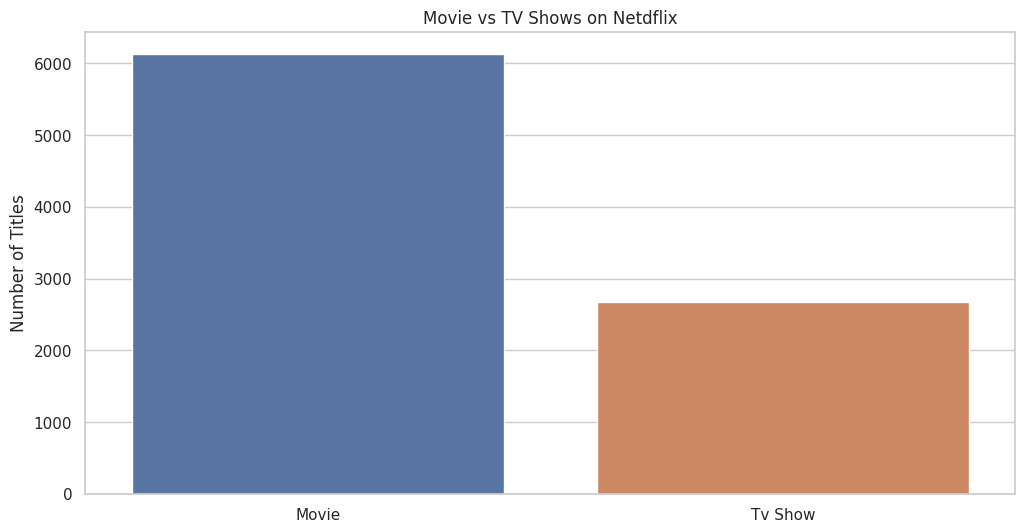

In [110]:
ax = sns.countplot(data=df_clean, x='type', order=df_clean['type'].value_counts().index)
# Chart title and labels
ax.set_title("Movie vs TV Shows on Netdflix")
ax.set_xlabel("")
ax.set_ylabel("Number of Titles")
plt.show

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


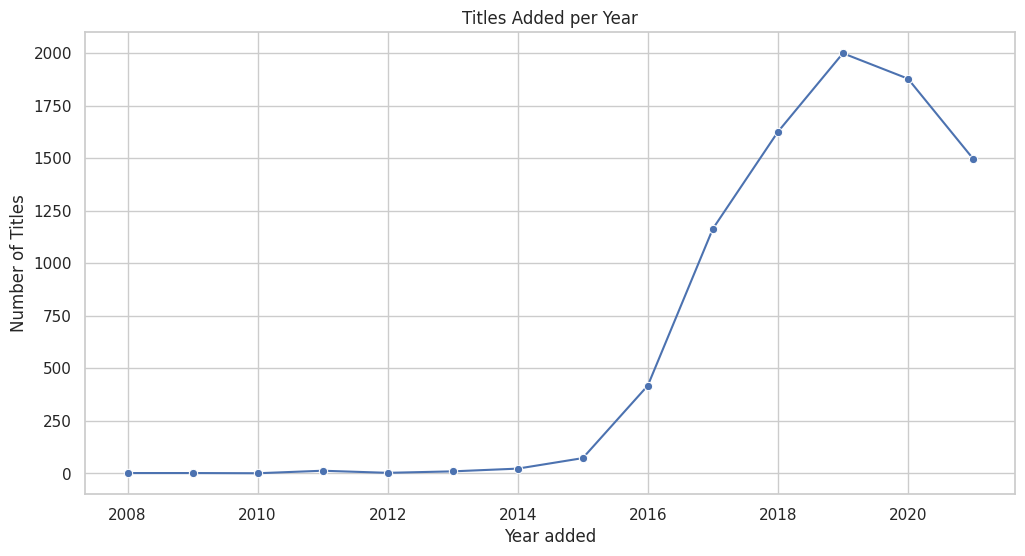

year_added
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

In [111]:
titles_per_year = df_clean['year_added'].value_counts().sort_index()
ax = sns.lineplot(x=titles_per_year.index, y =titles_per_year.values, marker='o')
ax.set_title("Titles Added per Year")
ax.set_xlabel("Year added")
ax.set_ylabel("Number of Titles")
plt.show()

titles_per_year.tail(10)

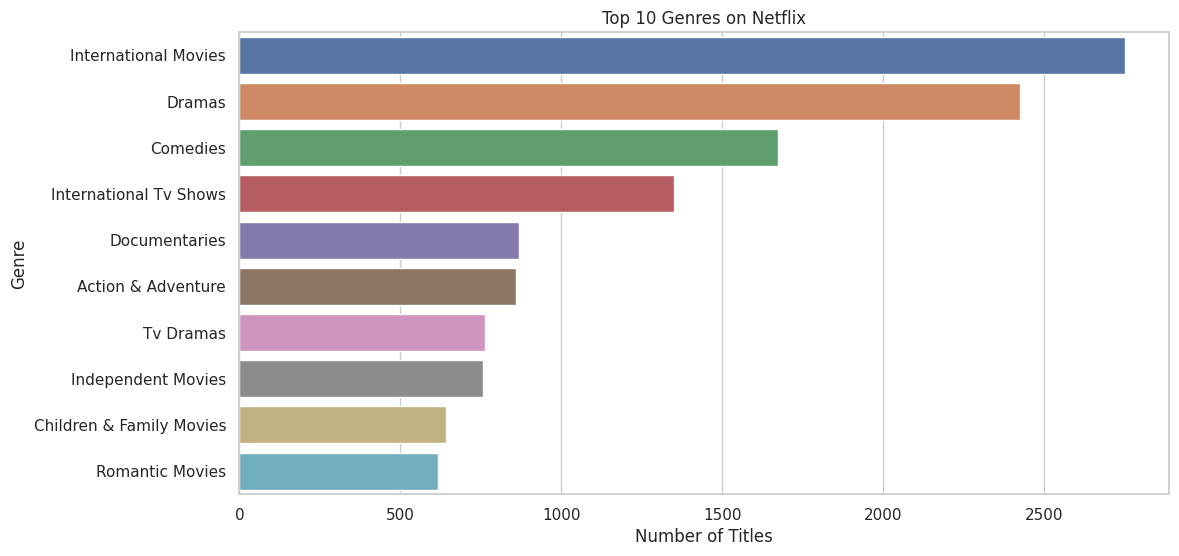

,count
genre,
International Movies,2752
Dramas,2427
Comedies,1674
International Tv Shows,1350
Documentaries,869
Action & Adventure,859
Tv Dramas,762
Independent Movies,756
Children & Family Movies,641


In [112]:
top_genres = df_genres['genre'].value_counts().head(10)
ax = sns.barplot(y=top_genres.index, x=top_genres.values)
ax.set_title("Top 10 Genres on Netflix")
ax.set_xlabel("Number of Titles")
ax.set_ylabel("Genre")
plt.show()

top_genres.to_frame("count")

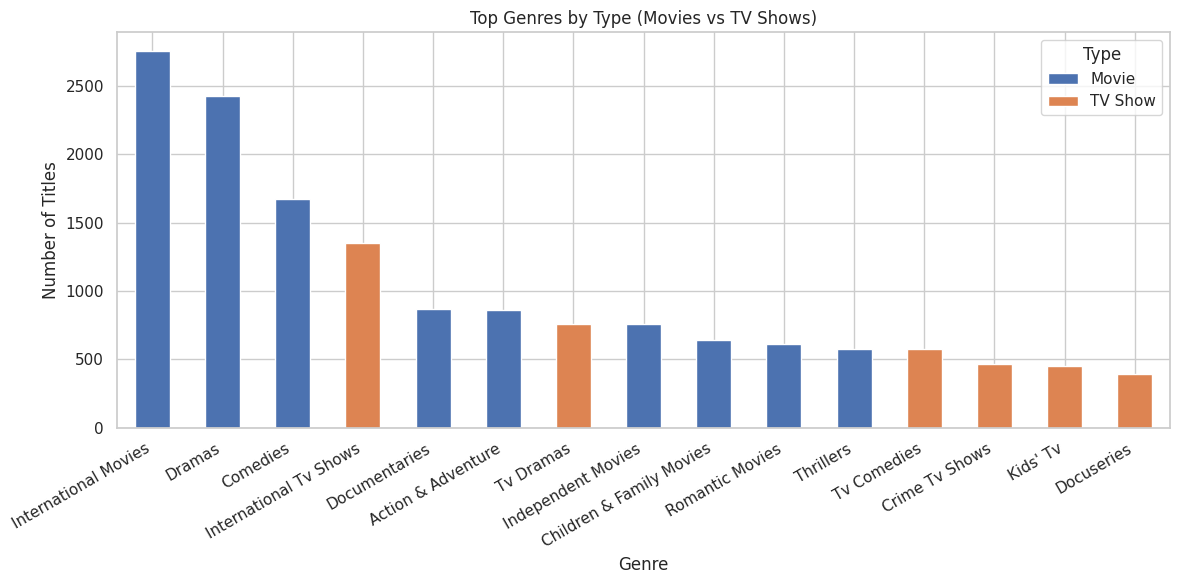

type,Movie,TV Show
genre,,
International Movies,2752,0
Dramas,2427,0
Comedies,1674,0
International Tv Shows,0,1350
Documentaries,869,0
Action & Adventure,859,0
Tv Dramas,0,762
Independent Movies,756,0
Children & Family Movies,641,0


In [120]:
genre_type = (df_genres
              .groupby(['genre','type'])['show_id']
              .count()
              .unstack(fill_value=0))

genre_type['Total'] = genre_type.sum(axis=1)
genre_type = genre_type.sort_values('Total', ascending=False).drop(columns='Total')

topN = 15

ax = genre_type.head(topN).plot(kind='bar', stacked=True, figsize=(12,6))
ax.set_title("Top Genres by Type (Movies vs TV Shows)")
ax.set_xlabel("Genre")
ax.set_ylabel("Number of Titles")
ax.legend(title="Type")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

genre_type.head(topN)

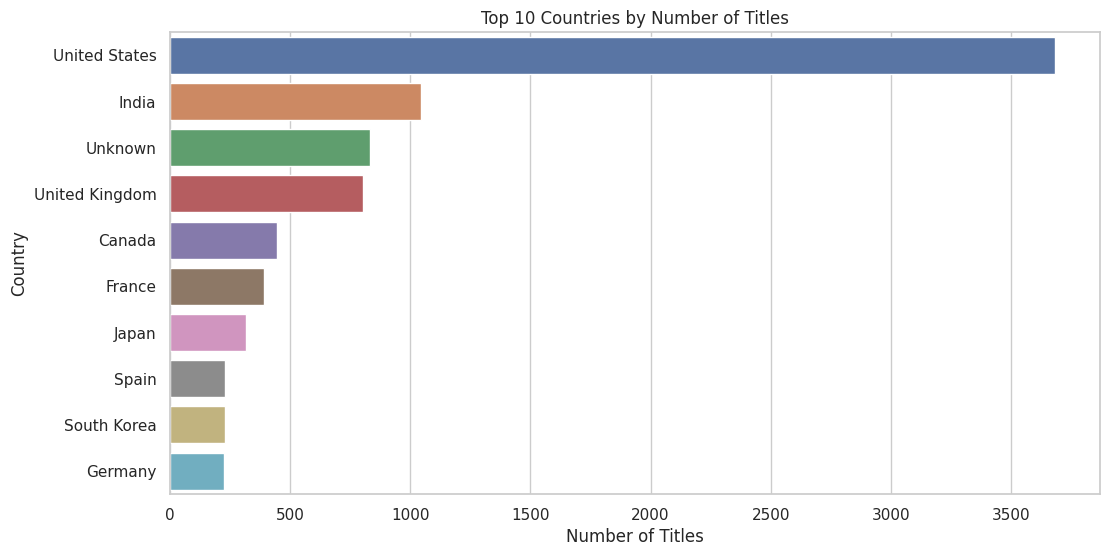

,count
country_spl,
United States,3683
India,1046
Unknown,832
United Kingdom,803
Canada,445
France,393
Japan,317
Spain,232
South Korea,231


In [115]:
top_countries = df_countries['country_spl'].value_counts().head(10)
ax = sns.barplot(y=top_countries.index, x=top_countries.values)
ax.set_title("Top 10 Countries by Number of Titles")
ax.set_xlabel("Number of Titles")
ax.set_ylabel("Country")
plt.show()

top_countries.to_frame("count")

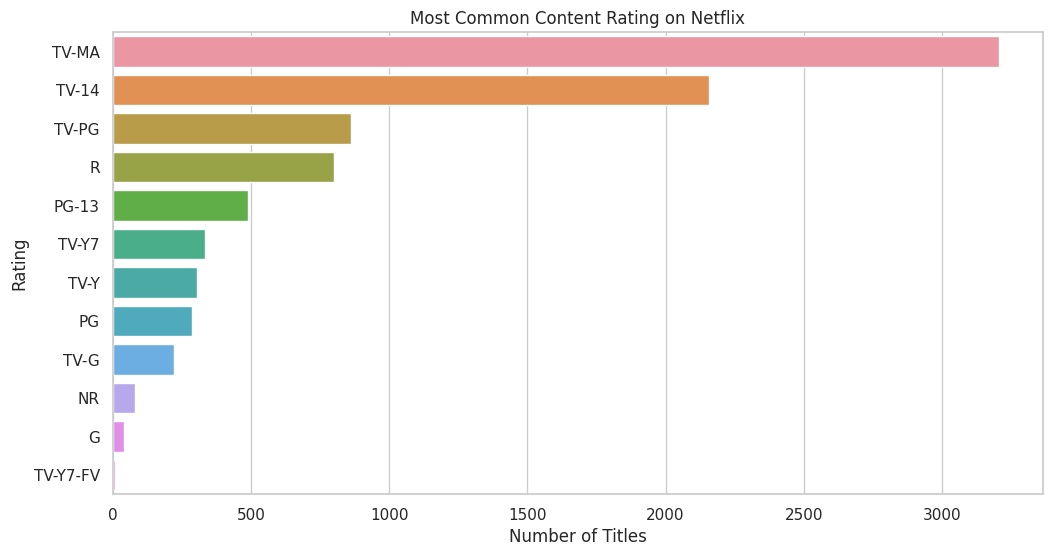

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


In [116]:
ratings = df_clean['rating'].dropna().str.strip().replace('', np.nan).dropna()
top_ratings = ratings.value_counts().head(12)

ax = sns.barplot(y=top_ratings.index, x=top_ratings.values)
ax.set_title("Most Common Content Rating on Netflix")
ax.set_xlabel("Number of Titles")
ax.set_ylabel("Rating")
plt.show()

top_ratings.to_frame("count")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


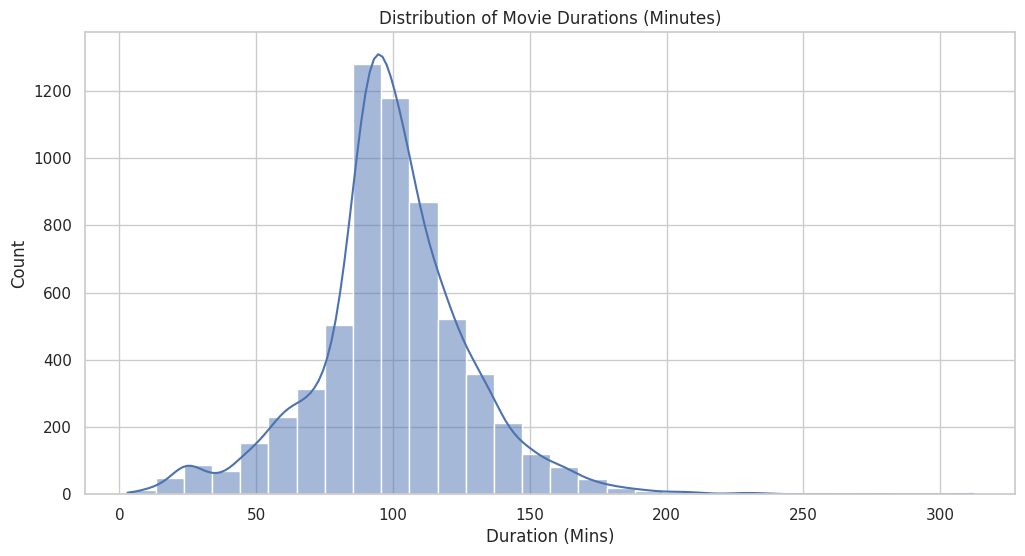

count    6128.00
mean       99.58
std        28.29
min         3.00
25%        87.00
50%        98.00
75%       114.00
max       312.00
Name: duration_mins, dtype: float64

In [117]:
# Filter only Movies from the cleaned dataset
movies = df_clean[df_clean['type'] == 'Movie'].copy()
movies['duration_mins'] = pd.to_numeric(movies['duration'].str.extract(r'(\d+)')[0], errors='coerce')

# 'bins=30'  number of histogram bars
# 'kde=True'  overlay a smoothed curve for visualising the distribution
ax = sns.histplot(movies['duration_mins'].dropna(), bins=30, kde=True)
ax.set_title("Distribution of Movie Durations (Minutes)")
ax.set_xlabel("Duration (Mins)")
ax.set_ylabel("Count")
plt.show()

movies['duration_mins'].describe().round(2)

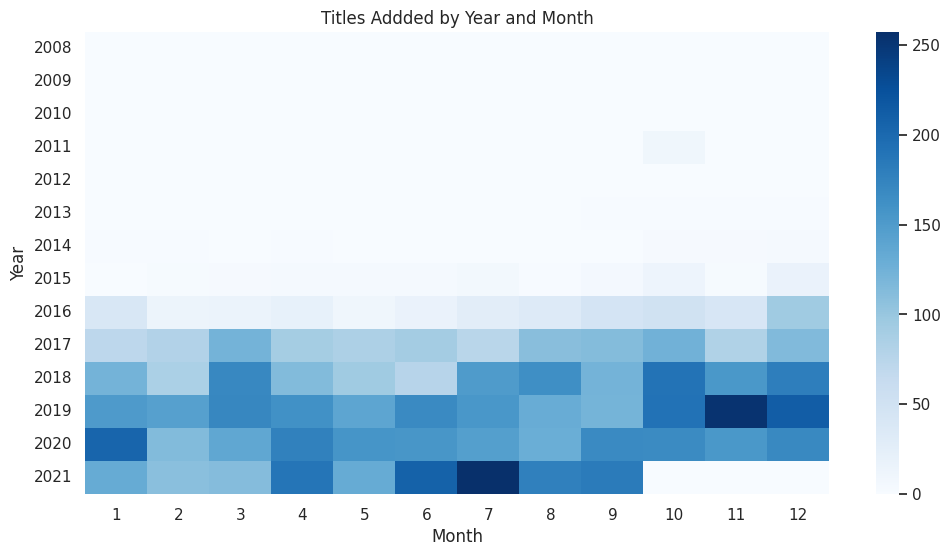

month_added,1,2,3,4,5,6,7,8,9,10,11,12
year_added,,,,,,,,,,,,
2012,0,1,0,0,0,0,0,0,0,0,1,1
2013,0,0,1,0,0,0,0,1,2,2,2,2
2014,2,2,0,2,0,1,1,1,1,4,4,5
2015,1,3,4,5,5,5,7,2,6,14,3,18
2016,41,15,16,21,11,18,28,34,46,51,42,95
2017,72,81,123,91,85,92,75,110,113,125,82,115
2018,123,86,170,114,95,77,150,163,123,190,154,180
2019,151,145,171,161,139,168,155,131,122,191,253,212
2020,204,114,137,177,157,156,146,129,168,167,154,169


In [118]:
ym = (df_clean.dropna(subset=['year_added', 'month_added']) # Remove rows with missing year/month
      # Convert columns to integer for grouping
     .assign(year_added=lambda d: d['year_added'].astype(int),
            month_added=lambda d: d['month_added'].astype(int))
     .groupby(['year_added','month_added'])['show_id']
     .count()
      # Convert months into columns (pivot table), fill NaNs with 0
     .unstack(fill_value=0)
     )
plt.figure(figsize=(12,6))
sns.heatmap(ym, cmap="Blues") # darker blue = more titles added
plt.title("Titles Addded by Year and Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

ym.tail(10)

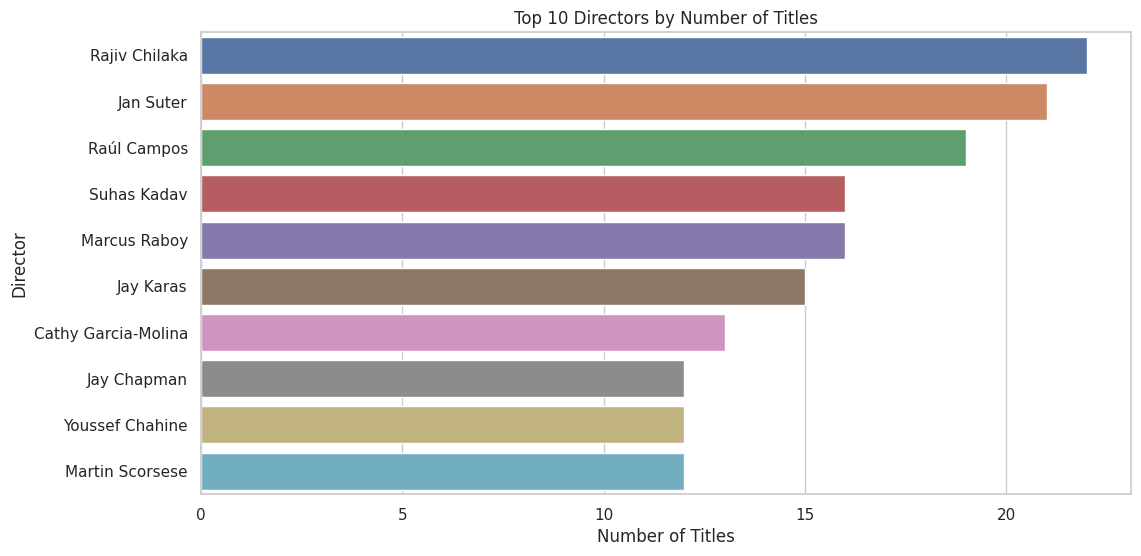

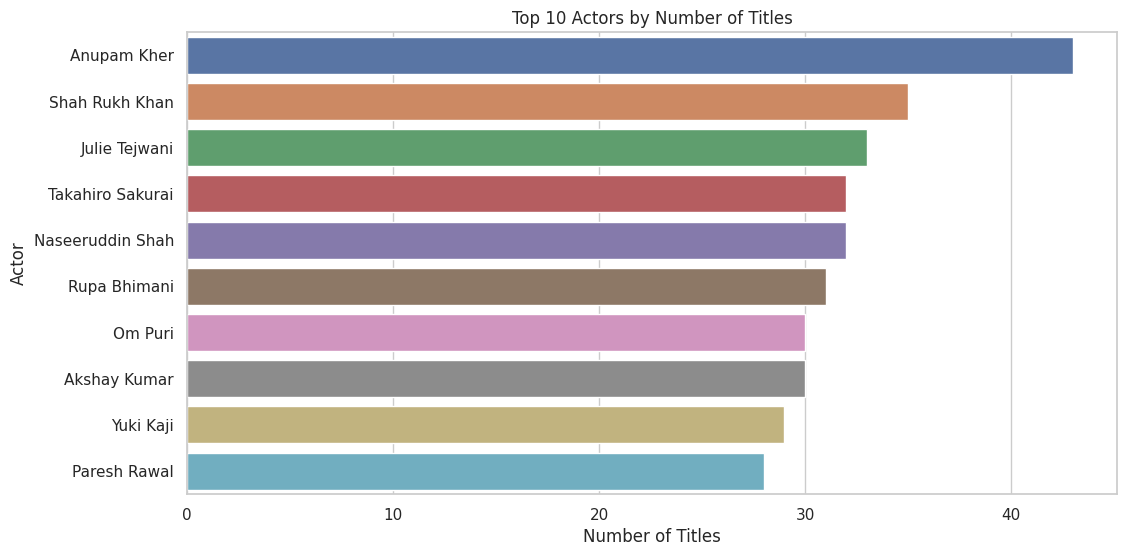

In [119]:
#Directors
top_directors = (df_clean['director']
                 .dropna()
                 .str.split(', ')
                 .explode()
                 .str.strip()
                 .value_counts()
                 .head(10))

ax = sns.barplot(y=top_directors.index, x=top_directors.values)
ax.set_title("Top 10 Directors by Number of Titles")
ax.set_xlabel("Number of Titles")
ax.set_ylabel("Director")
plt.show()

# Actors / Cast
top_cast = (df_clean['cast']
            .dropna()
            .str.split(', ')
            .explode()
            .str.strip()
            .value_counts()
            .head(10))

ax = sns.barplot(y=top_cast.index, x=top_cast.values)
ax.set_title("Top 10 Actors by Number of Titles")
ax.set_xlabel("Number of Titles")
ax.set_ylabel("Actor")
plt.show()
